In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Reading data
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Number of rows and cols
df.shape

(1599, 12)

In [4]:
# Description in detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- No missing data
- All the features are numerical, so no preprocessing required in that area

In [5]:
# Duplicates check
df.loc[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
# Dropping duplicate records
df.drop_duplicates(ignore_index=True, inplace=True)

In [7]:
df.loc[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [8]:
# Separating independent and dependent variables
x = df.drop('quality', axis=1)
y = df['quality']

In [9]:
x.shape

(1359, 11)

In [10]:
y.shape

(1359,)

In [11]:
# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
# PCA on scaled data
pca = PCA(svd_solver='randomized', random_state=38)
pca.fit(x_scaled)

PCA(random_state=38, svd_solver='randomized')

In [13]:
# PCA components created with eigen vectors
pca.components_

array([[ 0.48531406, -0.23939486,  0.4625388 ,  0.13440167,  0.21413205,
        -0.02313772,  0.03602661,  0.39174487, -0.4442526 ,  0.25049072,
        -0.11789227],
       [-0.11122031,  0.27647402, -0.1553705 ,  0.23786931,  0.13078313,
         0.51246066,  0.57633816,  0.23062846,  0.00224182, -0.05474433,
        -0.40298024],
       [-0.12863388, -0.44388189,  0.23654539,  0.11426566, -0.09231733,
         0.43680942,  0.32731423, -0.34977435,  0.05512213,  0.26285037,
         0.46527561],
       [-0.23566793,  0.07277667, -0.07455091, -0.40515993,  0.65384182,
        -0.02218085, -0.02815558, -0.17981877, -0.00277634,  0.54029684,
        -0.12804199],
       [-0.0878018 ,  0.25181864, -0.05469535,  0.73854102,  0.28569866,
        -0.16012522, -0.17825106,  0.13614119,  0.23200455,  0.23834997,
         0.33501538],
       [ 0.10794029,  0.41993799,  0.07196278,  0.01226145,  0.27641241,
        -0.03035831,  0.15968219, -0.40263888, -0.5374393 , -0.37520054,
         0.334

In [14]:
# Variance Ratio
pca.explained_variance_ratio_

array([0.28293989, 0.17347505, 0.14066813, 0.11368012, 0.08735304,
       0.05796439, 0.05335491, 0.03746183, 0.03126706, 0.01647314,
       0.00536244])

Text(0, 0.5, 'Variance Ratio')

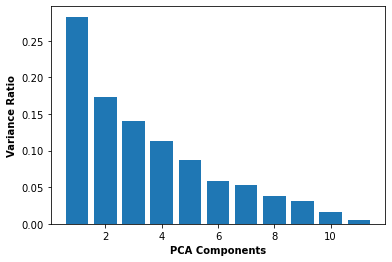

In [15]:
# Variance Ratio bar plot for each PCA component
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

##### Inference
- PC1 explains ~28% variance
- PC2 explains ~17% variance

Text(0, 0.5, 'Cumulative Explained Variance')

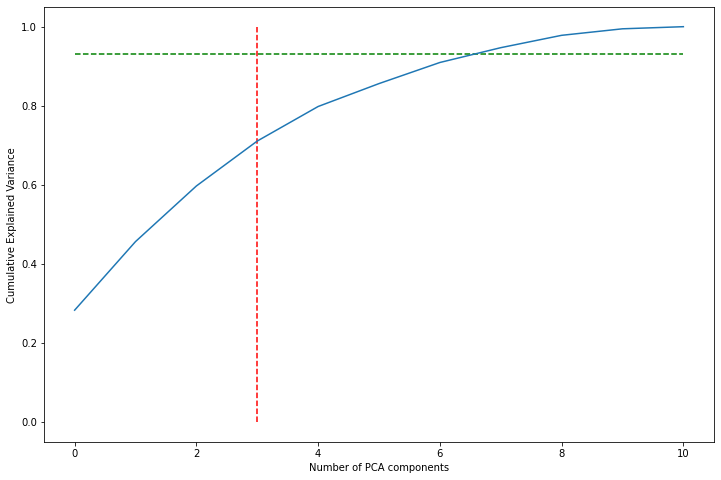

In [16]:
# Scree plot to visualize the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=7, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=10, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

90% variance explained by 7 principal components, hence proceeding with that many PCs

In [17]:
# Checking which attributes are well explained by the pca components
org_col = list(x.columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],
                               'PC_3':pca.components_[2], 'PC_4':pca.components_[3], 'PC_5':pca.components_[4],
                              'PC_6':pca.components_[5], 'PC_7':pca.components_[6]})
attributes_pca

,Attribute,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,fixed acidity,0.485314,-0.111220,-0.128634,-0.235668,-0.087802,0.107940,-0.361534
1,volatile acidity,-0.239395,0.276474,-0.443882,0.072777,0.251819,0.419938,-0.520927
2,citric acid,0.462539,-0.155371,0.236545,-0.074551,-0.054695,0.071963,0.097930
3,residual sugar,0.134402,0.237869,0.114266,-0.405160,0.738541,0.012261,0.300662
4,chlorides,0.214132,0.130783,-0.092317,0.653842,0.285699,0.276412,0.358134
5,free sulfur dioxide,-0.023138,0.512461,0.436809,-0.022181,-0.160125,-0.030358,-0.154502
6,total sulfur dioxide,0.036027,0.576338,0.327314,-0.028156,-0.178251,0.159682,-0.068147
7,density,0.391745,0.230628,-0.349774,-0.179819,0.136141,-0.402639,-0.181961
8,pH,-0.444253,0.002242,0.055122,-0.002776,0.232005,-0.537439,-0.060555
9,sulphates,0.250491,-0.054744,0.262850,0.540297,0.238350,-0.375201,-0.433570


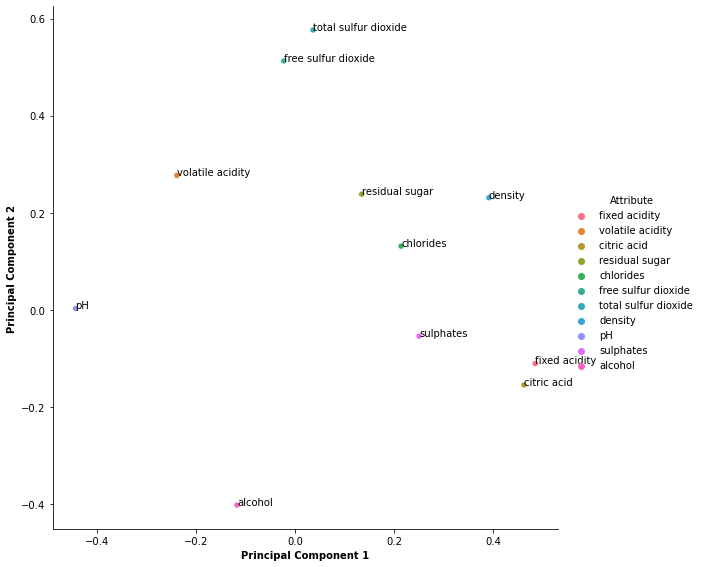

In [18]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

- PC2 explains 'total sulfur dioxide' and 'free sulfur dioxide' better than PC1
- 'density', 'fixed acidity' and 'citric acid' are well explained by PC1

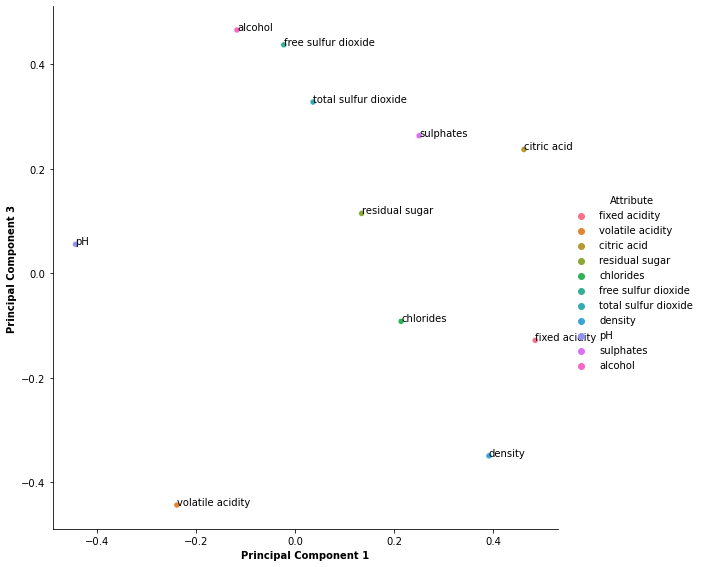

In [19]:
# Plotting the above dataframe for better visualization with PC1 and PC3

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

'alcohol' is explained by PC3 better than PC1 or PC2

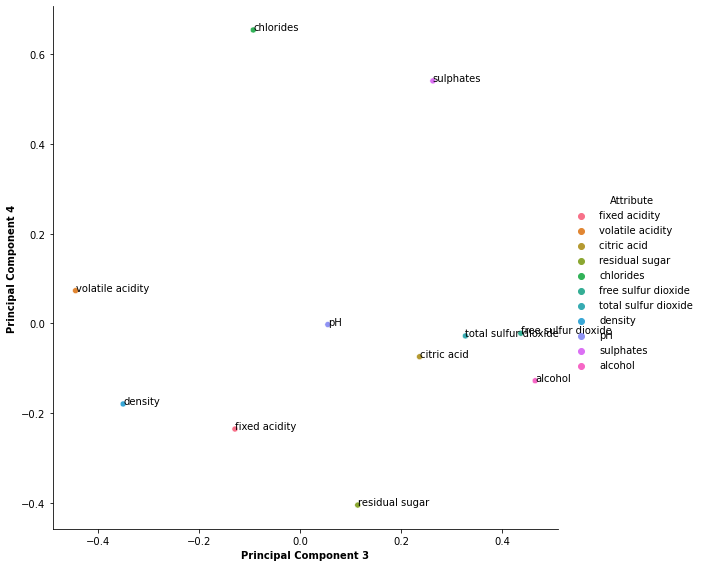

In [20]:
# Plotting the above dataframe for better visualization with PC3 and PC4

sns.pairplot(data=attributes_pca, x_vars=["PC_3"], y_vars=["PC_4"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 3",fontweight = 'bold')
plt.ylabel("Principal Component 4",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_3[i],attributes_pca.PC_4[i]))

- PC4 explains 'chlorides' very well
- 'sulphates' are explained by PC3 & PC4 collectively

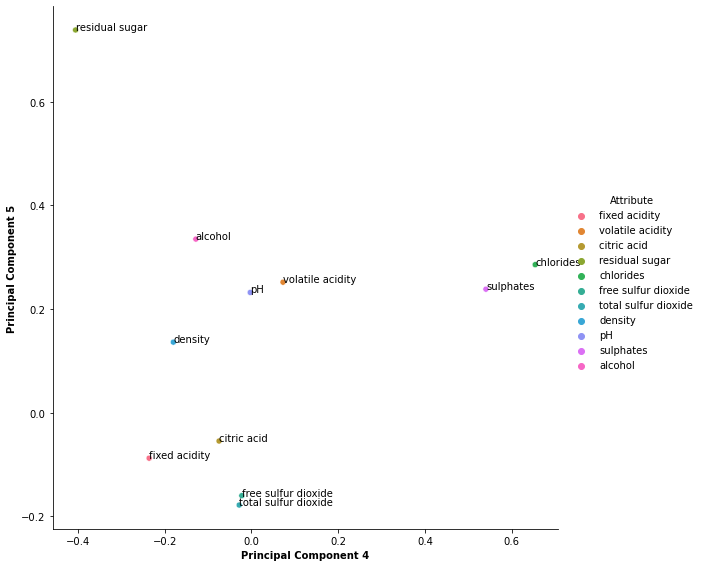

In [21]:
# Plotting the above dataframe for better visualization with PC4 and PC5

sns.pairplot(data=attributes_pca, x_vars=["PC_4"], y_vars=["PC_5"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 4",fontweight = 'bold')
plt.ylabel("Principal Component 5",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_4[i],attributes_pca.PC_5[i]))

PC5 explains 'residual sugar' level better than the previous components we've seen

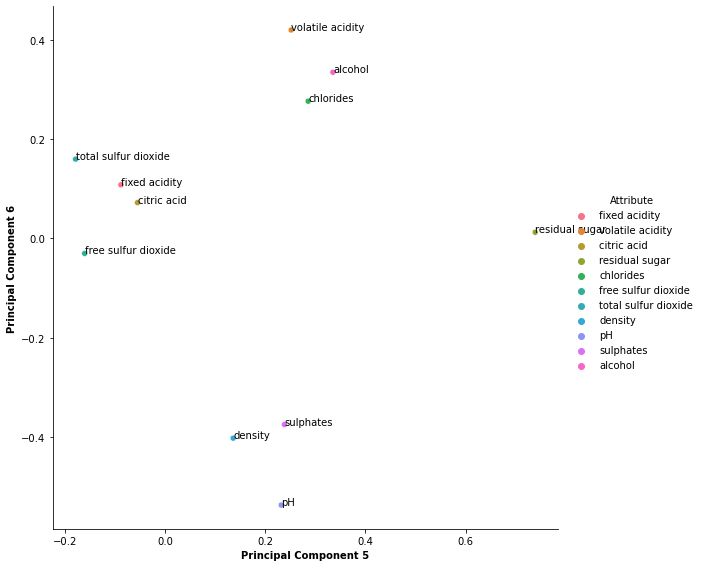

In [22]:
# Plotting the above dataframe with PC5 and PC6

sns.pairplot(data=attributes_pca, x_vars=["PC_5"], y_vars=["PC_6"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 5",fontweight = 'bold')
plt.ylabel("Principal Component 6",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_5[i],attributes_pca.PC_6[i]))

'volatile acidity' is captured well by PC6

In [25]:
# Building the dataframe with 7 components
inc_pca = PCA(n_components=7)

In [26]:
# Fitting the scaled df on incremental pca
df_inc_pca = inc_pca.fit_transform(x_scaled)
df_inc_pca

array([[-1.61718452,  0.48304706, -1.76538065, ...,  0.0112697 ,
        -0.91806225, -0.16843296],
       [-0.7597499 ,  1.85190223, -0.87078223, ...,  0.11236163,
         0.91703154, -0.93595834],
       [-0.7299115 ,  0.89022684, -1.15338249, ...,  0.02257443,
         0.40172915, -0.47673072],
       ...,
       [-2.17130497,  0.89054086,  1.80767947, ...,  0.07209456,
        -0.73430392, -0.68163713],
       [-2.23816515,  0.98568537,  0.64387164, ...,  0.02869917,
        -0.89944475, -0.38554554],
       [-0.43087385, -0.54842879,  1.61710742, ...,  0.42771134,
        -0.55491419,  1.1749135 ]])

In [27]:
# Creating new dataframe with principal components
df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1","PC_2","PC_3","PC_4","PC_5","PC_6","PC_7"])
df_pca_final = pd.concat([y, df_pca], axis=1)
df_pca_final.head()

,quality,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,5,-1.617185,0.483047,-1.765381,0.043742,0.011270,-0.918062,-0.168433
1,5,-0.759750,1.851902,-0.870782,0.519611,0.112362,0.917032,-0.935958
2,5,-0.729912,0.890227,-1.153382,0.383922,0.022574,0.401729,-0.476731
3,6,2.361030,-0.235496,0.198337,-0.897565,-1.509746,-0.087904,0.307927
4,5,-1.577087,0.604042,-1.532463,0.035250,-0.166895,-0.993503,-0.125875


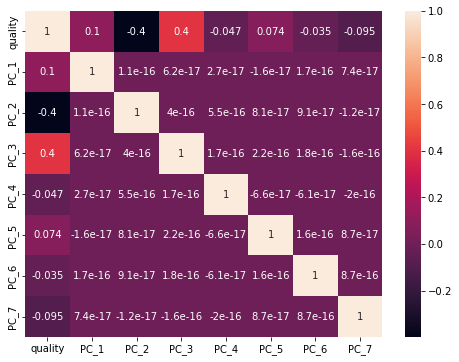

In [28]:
# Plotting heatmap to check correlation
plt.figure(figsize = (8,6))        
ax = sns.heatmap(df_pca_final.corr(),annot = True)
plt.show()

In [29]:
## end of notebook